<a href="https://colab.research.google.com/github/positivejmk/2021-2-practice/blob/master/ARIMA%2C%20fbprophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

#1. Load Data

In [4]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/BigMining/Online Retail.xlsx', sheet_name='Online Retail')

In [5]:
df.shape

(541909, 8)

In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


#2. Product Analytics

###-Quantity Distribution

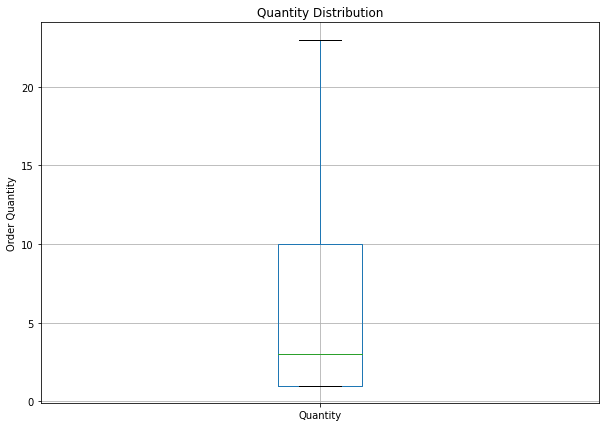

In [16]:
ax = df['Quantity'].plot.box(
    showfliers = False, # 이상치 보여줄 건지 옵션
    grid = True,
    figsize = (10,7)
)

ax.set_ylabel('Order Quantity')
ax.set_title('Quantity Distribution')

plt.suptitle("")
plt.show()

In [8]:
pd.DataFrame(df['Quantity'].describe())

,Quantity
count,541909.000000
mean,9.552250
std,218.081158
min,-80995.000000
25%,1.000000
50%,3.000000
75%,10.000000
max,80995.000000


In [9]:
df.loc[df['Quantity'] > 0].shape

(531285, 8)

In [10]:
df.shape

(541909, 8)

In [12]:
#주문수량 > 0으로 df 데이터 수정
df = df.loc[df['Quantity'] > 0]

###-Time-series Number of Orders

In [13]:
#월별주문건수
monthly_orders_df = df.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()

In [14]:
monthly_orders_df

InvoiceDate
2010-12-31    1629
2011-01-31    1120
2011-02-28    1126
2011-03-31    1531
2011-04-30    1318
2011-05-31    1731
2011-06-30    1576
2011-07-31    1540
2011-08-31    1409
2011-09-30    1896
2011-10-31    2129
2011-11-30    2884
2011-12-31     839
Freq: M, Name: InvoiceNo, dtype: int64

([<matplotlib.axis.XTick at 0x7f7d8bc4bc90>,
 [Text(0, 0, '12.10'),
  Text(0, 0, '01.11'),
  Text(0, 0, '02.11'),
  Text(0, 0, '03.11'),
  Text(0, 0, '04.11'),
  Text(0, 0, '05.11'),
  Text(0, 0, '06.11'),
  Text(0, 0, '07.11'),
  Text(0, 0, '08.11'),
  Text(0, 0, '09.11'),
  Text(0, 0, '10.11'),
  Text(0, 0, '11.11'),
  Text(0, 0, '12.11')])

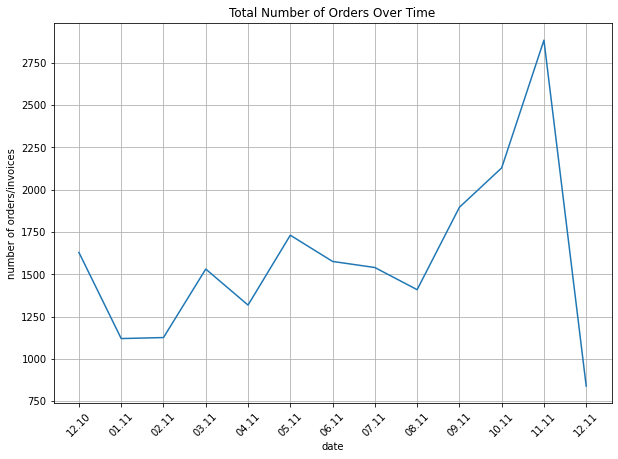

In [19]:
ax = pd.DataFrame(monthly_orders_df.values).plot(
    grid = True,
    figsize = (10,7),
    legend = False
)

ax.set_xlabel('date')
ax.set_ylabel('number of orders/invoices')
ax.set_title('Total Number of Orders Over Time')

plt.xticks(
    range(len(monthly_orders_df.index)),
    [x.strftime('%m.%y') for x in monthly_orders_df.index],
    rotation = 45
)

In [20]:
invoice_dates = df.loc[
                       df['InvoiceDate'] >= '2011-12-01',
                       'InvoiceDate'
]

In [21]:
print('Min date : %s\nMax date : %s' % (invoice_dates.min(), invoice_dates.max()))

Min date : 2011-12-01 08:33:00
Max date : 2011-12-09 12:50:00


In [24]:
df = df.loc[df['InvoiceDate'] < '2011-12-01']

In [25]:
monthly_orders_df = df.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()

In [26]:
monthly_orders_df

InvoiceDate
2010-12-31    1629
2011-01-31    1120
2011-02-28    1126
2011-03-31    1531
2011-04-30    1318
2011-05-31    1731
2011-06-30    1576
2011-07-31    1540
2011-08-31    1409
2011-09-30    1896
2011-10-31    2129
2011-11-30    2884
Freq: M, Name: InvoiceNo, dtype: int64

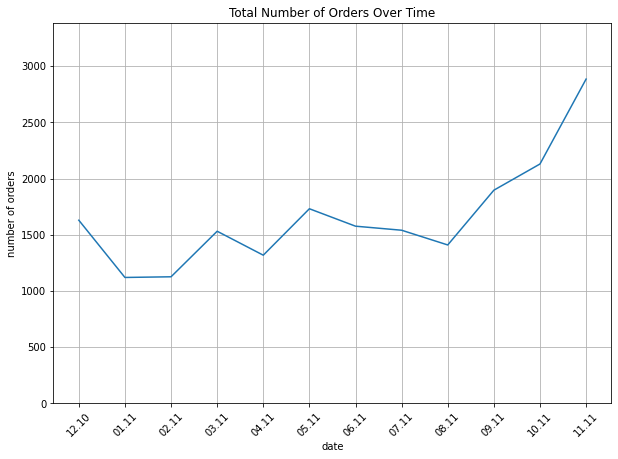

In [29]:
ax = pd.DataFrame(monthly_orders_df.values).plot(
    grid = True,
    figsize = (10,7),
    legend = False
)

ax.set_xlabel('date')
ax.set_ylabel('number of orders')
ax.set_title('Total Number of Orders Over Time')

ax.set_ylim([0, max(monthly_orders_df.values)+500])

plt.xticks(
    range(len(monthly_orders_df.index)),
    [x.strftime('%m.%y') for x in monthly_orders_df.index],
    rotation = 45
)

plt.show()

###-Time Series Revenue

In [30]:
df['Sales'] = df['Quantity'] * df['UnitPrice']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
monthly_revenue_df = df.set_index('InvoiceDate')['Sales'].resample('M').sum()

In [32]:
monthly_revenue_df

InvoiceDate
2010-12-31     823746.140
2011-01-31     691364.560
2011-02-28     523631.890
2011-03-31     717639.360
2011-04-30     537808.621
2011-05-31     770536.020
2011-06-30     761739.900
2011-07-31     719221.191
2011-08-31     737014.260
2011-09-30    1058590.172
2011-10-31    1154979.300
2011-11-30    1509496.330
Freq: M, Name: Sales, dtype: float64

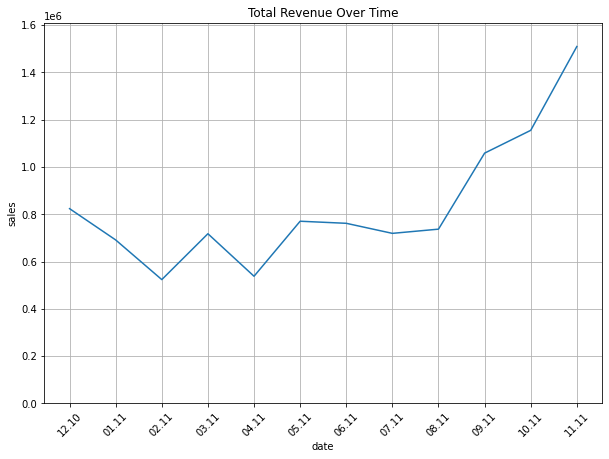

In [34]:
ax = pd.DataFrame(monthly_revenue_df.values).plot(
    grid = True,
    figsize = (10,7),
    legend = False
)

ax.set_xlabel('date')
ax.set_ylabel('sales')
ax.set_title('Total Revenue Over Time')

ax.set_ylim([0, max(monthly_revenue_df.values) + 100000])

plt.xticks(
    range(len(monthly_revenue_df.values)),
    [x.strftime('%m.%y') for x in monthly_revenue_df.index],
    rotation = 45
)

plt.show()

###-Time Series Repeat Customers

In [35]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [43]:
#주문번호, 주문날짜별로 아이디 나눠서 통합 | 한 아이디가 하루에 산 금액

invoice_customer_df = df.groupby(
    by = ['InvoiceNo', 'InvoiceDate']
).agg({
    'Sales' : sum,
    'CustomerID': max,
    'Country' : max,
}).reset_index()

In [44]:
invoice_customer_df.head()

,InvoiceNo,InvoiceDate,Sales,CustomerID,Country
0,536365,2010-12-01 08:26:00,139.12,17850.0,United Kingdom
1,536366,2010-12-01 08:28:00,22.20,17850.0,United Kingdom
2,536367,2010-12-01 08:34:00,278.73,13047.0,United Kingdom
3,536368,2010-12-01 08:34:00,70.05,13047.0,United Kingdom
4,536369,2010-12-01 08:35:00,17.85,13047.0,United Kingdom


In [51]:
monthly_repeat_customers_df = invoice_customer_df.set_index('InvoiceDate').groupby([
    pd.Grouper(freq = 'M'), 'CustomerID'                                                                                    
]).filter(lambda x: len(x) > 1).resample('M').nunique()['CustomerID']

In [52]:
monthly_repeat_customers_df

InvoiceDate
2010-12-31    263
2011-01-31    153
2011-02-28    153
2011-03-31    203
2011-04-30    170
2011-05-31    281
2011-06-30    220
2011-07-31    227
2011-08-31    198
2011-09-30    272
2011-10-31    324
2011-11-30    541
Freq: M, Name: CustomerID, dtype: int64

In [49]:
monthly_unique_customers_df = df.set_index('InvoiceDate')['CustomerID'].resample('M').nunique()

In [50]:
monthly_unique_customers_df

InvoiceDate
2010-12-31     885
2011-01-31     741
2011-02-28     758
2011-03-31     974
2011-04-30     856
2011-05-31    1056
2011-06-30     991
2011-07-31     949
2011-08-31     935
2011-09-30    1266
2011-10-31    1364
2011-11-30    1665
Freq: M, Name: CustomerID, dtype: int64

In [53]:
monthly_repeat_percentage = monthly_repeat_customers_df/monthly_unique_customers_df*100
monthly_repeat_percentage

InvoiceDate
2010-12-31    29.717514
2011-01-31    20.647773
2011-02-28    20.184697
2011-03-31    20.841889
2011-04-30    19.859813
2011-05-31    26.609848
2011-06-30    22.199798
2011-07-31    23.919916
2011-08-31    21.176471
2011-09-30    21.484992
2011-10-31    23.753666
2011-11-30    32.492492
Freq: M, Name: CustomerID, dtype: float64

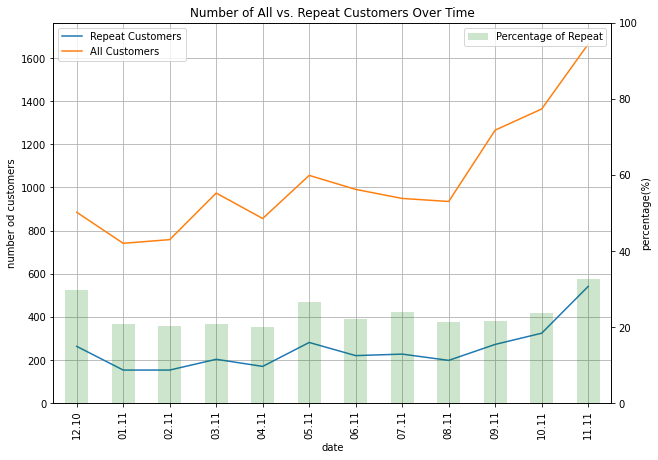

In [64]:
ax = pd.DataFrame(monthly_repeat_customers_df.values).plot(
    figsize = (10,7)
)

pd.DataFrame(monthly_unique_customers_df.values).plot(
    ax = ax, # ax 차트에 함께 그리기
    grid = True
)

ax2 = pd.DataFrame(monthly_repeat_percentage.values).plot.bar(
    ax = ax,
    grid = True,
    secondary_y = True, #y축 추가
    color = 'green',
    alpha = 0.2
)

ax.set_xlabel('date')
ax.set_ylabel('number od customers')
ax.set_title('Number of All vs. Repeat Customers Over Time')

ax2.set_ylabel('percentage(%)')

ax.legend(['Repeat Customers', 'All Customers'])
ax2. legend(['Percentage of Repeat'], loc = 'upper right')

ax.set_ylim([0, monthly_unique_customers_df.values.max() +100])
ax2.set_ylim([0,100])

plt.xticks(
    range(len(monthly_repeat_customers_df.index)),
    [x.strftime('%m.%y') for x in monthly_repeat_customers_df.index],
    rotation = 45
)

plt.show()

###-Revenue from Repeat Customers

In [65]:
monthly_rev_repeat_customers_df = invoice_customer_df.set_index('InvoiceDate').groupby([
             pd.Grouper(freq = 'M'), 'CustomerID'
]).filter(lambda x: len(x) >1).resample('M').sum()['Sales']

In [66]:
monthly_rev_perc_repeat_customers_df = monthly_rev_repeat_customers_df/monthly_revenue_df *100


In [67]:
monthly_rev_repeat_customers_df

InvoiceDate
2010-12-31    359170.60
2011-01-31    222124.00
2011-02-28    191229.37
2011-03-31    267390.48
2011-04-30    195474.18
2011-05-31    378197.04
2011-06-30    376307.26
2011-07-31    317475.00
2011-08-31    317134.25
2011-09-30    500663.36
2011-10-31    574006.87
2011-11-30    713775.85
Freq: M, Name: Sales, dtype: float64

[Text(0, 0, '12.10'),
 Text(0, 0, '01.11'),
 Text(0, 0, '02.11'),
 Text(0, 0, '03.11'),
 Text(0, 0, '04.11'),
 Text(0, 0, '05.11'),
 Text(0, 0, '06.11'),
 Text(0, 0, '07.11'),
 Text(0, 0, '08.11'),
 Text(0, 0, '09.11'),
 Text(0, 0, '10.11'),
 Text(0, 0, '11.11')]

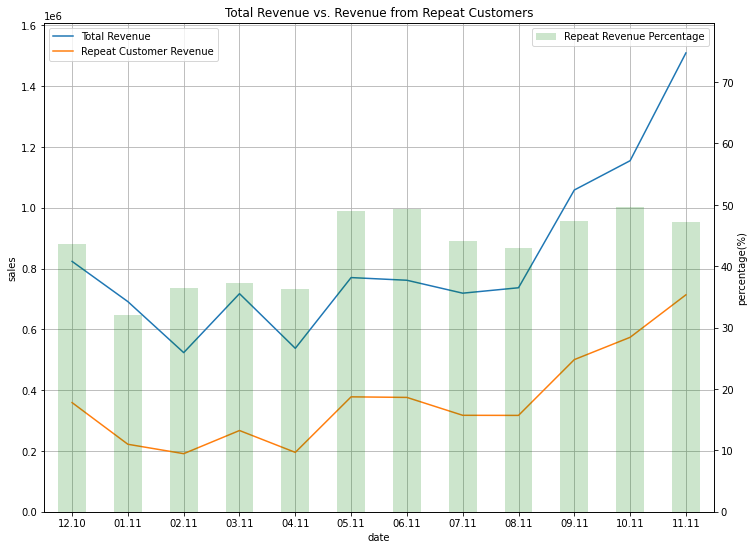

In [72]:
ax = pd.DataFrame(monthly_revenue_df.values).plot(figsize = (12,9))

pd.DataFrame(monthly_rev_repeat_customers_df.values).plot(
    ax = ax,
    grid = True,
)

ax.set_xlabel('date')
ax.set_ylabel('sales')
ax.set_title('Total Revenue vs. Revenue from Repeat Customers')

ax.legend(['Total Revenue', 'Repeat Customer Revenue'])

ax.set_ylim([0, max(monthly_revenue_df.values) + 100000])

ax2 = ax.twinx()

pd.DataFrame(monthly_rev_perc_repeat_customers_df.values).plot(
    ax = ax2,
    kind = 'bar',
    color = 'g',
    alpha = 0.2 # 투명도 조절
)

ax2.set_ylim([0, max(monthly_rev_perc_repeat_customers_df.values)+30])
ax2.set_ylabel('percentage(%)')
ax2.legend(['Repeat Revenue Percentage'])

ax2.set_xticklabels([
                     x.strftime('%m.%y') for x in monthly_rev_perc_repeat_customers_df.index
])

###-Popular Items Over Time

In [73]:
date_item_df = pd.DataFrame(
    df.set_index('InvoiceDate').groupby([
                pd.Grouper(freq= 'M'), 'StockCode'
    ])['Quantity'].sum()
)

date_item_df

Quantity
InvoiceDate StockCode          
2010-12-31  10002           251
            10120            16
            10125           154
            10133           130
            10135           411
...                         ...
2011-11-30  C2              173
            DCGSSGIRL         1
            DOT              47
            M              3894
            POST           1262

[31701 rows x 1 columns]

In [74]:
#Rank items by the last month sales

last_month_sorted_df = date_item_df.loc['2011-11-30'].sort_values(
    by = 'Quantity', ascending = False
).reset_index()

last_month_sorted_df

,InvoiceDate,StockCode,Quantity
0,2011-11-30,23084,14954
1,2011-11-30,84826,12551
2,2011-11-30,22197,12460
3,2011-11-30,22086,7908
4,2011-11-30,85099B,5909
...,...,...,...
2941,2011-11-30,84549,1
2942,2011-11-30,84527,1
2943,2011-11-30,90082B,1
2944,2011-11-30,90082D,1


In [75]:
date_item_df = pd.DataFrame(
    df.loc[
           df['StockCode'].isin([23084, 84826, 22197, 22086, '85099B'])
    ].set_index('InvoiceDate').groupby([
           pd.Grouper(freq = 'M'), 'StockCode'
    ])['Quantity'].sum()
)

In [76]:
date_item_df

Quantity
InvoiceDate StockCode          
2010-12-31  22086          2460
            22197          2738
            84826           366
            85099B         2152
2011-01-31  22086            24
            22197          1824
            84826           480
            85099B         2747
2011-02-28  22086             5
            22197          2666
            84826            66
            85099B         3080
2011-03-31  22086            87
            22197          2803
            84826            60
            85099B         5282
2011-04-30  22086            13
            22197          1869
            84826             1
            85099B         2456
2011-05-31  22086            17
            22197          6849
            23084          1131
            85099B         3621
2011-06-30  22086           344
            22197          2095
            23084          1713
            84826             4
            85099B         3682
2011-07-31  22086           383
            22197          1876
            23084           318
            84826             2
            85099B         3129
2011-08-31  22086           490
            22197          5421
            23084          2267
            84826            72
            85099B         5502
2011-09-30  22086          2106
            22197          4196
            23084           680
            85099B         4401
2011-10-31  22086          3429
            22197          5907
            23084          6348
            84826            11
            85099B         5412
2011-11-30  22086          7908
            22197         12460
            23084         14954
            84826         12551
            85099B         5909

In [79]:
trending_items_df = date_item_df.reset_index().pivot('InvoiceDate', 'StockCode').fillna(0)

trending_items_df = trending_items_df.reset_index()
trending_items_df = trending_items_df.set_index('InvoiceDate')
trending_items_df.columns = trending_items_df.columns.droplevel(0)

trending_items_df

StockCode,22086,22197,23084,84826,85099B
InvoiceDate,,,,,
2010-12-31,2460.0,2738.0,0.0,366.0,2152.0
2011-01-31,24.0,1824.0,0.0,480.0,2747.0
2011-02-28,5.0,2666.0,0.0,66.0,3080.0
2011-03-31,87.0,2803.0,0.0,60.0,5282.0
2011-04-30,13.0,1869.0,0.0,1.0,2456.0
2011-05-31,17.0,6849.0,1131.0,0.0,3621.0
2011-06-30,344.0,2095.0,1713.0,4.0,3682.0
2011-07-31,383.0,1876.0,318.0,2.0,3129.0
2011-08-31,490.0,5421.0,2267.0,72.0,5502.0


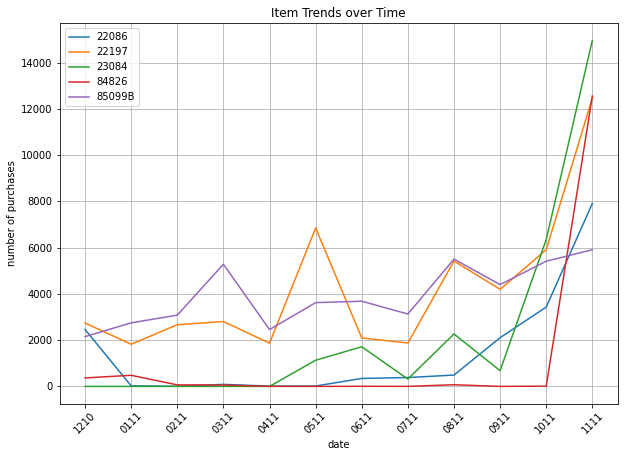

In [86]:
ax = pd.DataFrame(trending_items_df.values).plot(
    figsize = (10,7),
    grid = True
)

ax.set_xlabel('date')
ax.set_ylabel('number of purchases')
ax.set_title('Item Trends over Time')

ax.legend(trending_items_df.columns, loc = 'upper left')

plt.xticks(
    range(len(trending_items_df.index)),
    [x.strftime('%m%y') for x in trending_items_df.index],
    rotation = 45
    )

plt.show()

#3. (Prediction) Time Series Forecasting

####1) statsmodels 의 ARIMA 모델을 이용한 예측
####2) Facebook Prophet의 Additive 모델을 이용한 예측


In [87]:
#데이터 수집: 야후 파이낸스 데이터 불러오기

!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

     |████████████████████████████████| 6.3 MB 7.6 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.64-py2.py3-none-any.whl size=24109 sha256=f6c9a3e45f12d6145f5b91afb027e8398d8449e439a0109b5b49df0e095ed37f
  Stored in directory: /tmp/pip-ephem-wheel-cache-44vk8s1n/wheels/86/fe/9b/a4d3d78796b699e37065e5b6c27b75cff448ddb8b24943c288
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [98]:
samsung_df = yf.download('005930.KS',
                        start = '2021-01-01',
                        end = '2021-09-30',
                         progress = False) # 진행 막대를 표시하지 말라

In [99]:
samsung_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-24,77600.0,77700.0,77100.0,77300.0,76934.273438,12247274
2021-09-27,77300.0,77700.0,77000.0,77700.0,77332.375000,11699798
2021-09-28,77700.0,77800.0,76200.0,76300.0,75939.000000,15406382
2021-09-29,74800.0,75300.0,73800.0,74100.0,74100.000000,23992458
2021-09-30,74300.0,74800.0,73700.0,74100.0,74100.000000,19919361


In [100]:
samsung_df = samsung_df[['Close']]

samsung_df = samsung_df.reset_index()

samsung_df.columns = ['day', 'price']

samsung_df['day'] = pd.to_datetime(samsung_df['day'])

samsung_df.index = samsung_df['day']
samsung_df.set_index('day', inplace = True)

samsung_df

,price
day,
2021-01-04,83000.0
2021-01-05,83900.0
2021-01-06,82200.0
2021-01-07,82900.0
2021-01-08,88800.0
...,...
2021-09-24,77300.0
2021-09-27,77700.0
2021-09-28,76300.0


In [101]:
samsung_train_df = samsung_df[:180]
samsung_train_df

,price
day,
2021-01-04,83000.0
2021-01-05,83900.0
2021-01-06,82200.0
2021-01-07,82900.0
2021-01-08,88800.0
...,...
2021-09-14,76600.0
2021-09-15,77000.0
2021-09-16,76100.0


In [102]:
samsung_test_df = samsung_df[180:]
samsung_test_df

,price
day,
2021-09-24,77300.0
2021-09-27,77700.0
2021-09-28,76300.0
2021-09-29,74100.0
2021-09-30,74100.0


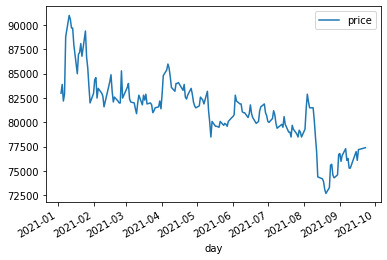

In [103]:
samsung_train_df.plot(
)

plt.show()

#### - statsmodels의 ARIMA 모델

* AR(Autoregression) 모델: 자기 자신의 과거를 정보로 사용 (현재의 상태는 이전의 상태를 참고해서 계산)
* MA(Moving Average) 모델: 이번 항에서의 오차를 이용하여 현재 항의 상태를 추론
* ARIMA(Autoregressice Integrated Moving Average) 모델:ARMA 모델에 추세 변동의 경향성까지 반영
* 파라미터 order=(3,1,2)
 - AR이 몇 번째 과거까지를 바라보는지(3)
 - 차분(Defference: 현재 상태의 변수에서 바로 전 상태의 변수를 빼주는 것)(1)
 - MA가 몇 번째 과거까지를 바라보는지(2)
* 결과 해석: p-value( P>|z| )가 0.05이하일때 유의미

In [104]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

#(AR = 3, 차분 = 1, MA = 2) 파라미터로 ARIMA 모델 학습

model = ARIMA(samsung_train_df.price.values, order = (3,1,2))
model_fit = model.fit(trend = 'c', full_output = True, disp = True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  179
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -1506.665
Method:                       css-mle   S.D. of innovations           1090.301
Date:                Fri, 12 Nov 2021   AIC                           3027.330
Time:                        12:04:40   BIC                           3049.641
Sample:                             1   HQIC                          3036.377
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -30.5141     76.615     -0.398      0.691    -180.677     119.649
ar.L1.D.y      1.3740      0.093     14.709      0.000       1.191       1.557
ar.L2.D.y     -0.9327      0.130     -7.197      0.0

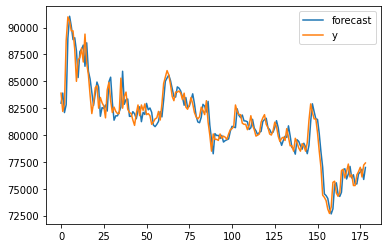

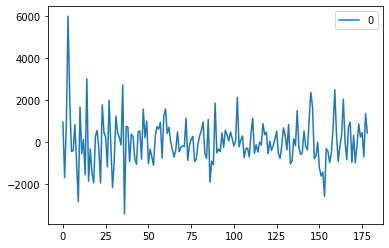

In [105]:
fig = model_fit.plot_predict() # 학습 데이터에 대한 예측 결과 (첫번째 그래프)
residuals = pd.DataFrame(model_fit.resid) # 잔차의 변동을 시각화 (두번째 그래프)
residuals.plot()

In [110]:
forecast_data = model_fit.forecast(steps = 5) #train 데이터 셋으로부터 5일 뒤 예측

pred_y = forecast_data[0].tolist() #마지막 5일 예측 데이터(예측, 실제, [최소,최대 예측값])
test_y = samsung_test_df.price.values #실제 5일 가격 데이터
pred_y_lower = [] #마지막 5일 예측 데이터 최소값
pred_y_upper = [] #마지막 5일 예측 데이터 최대값

for lower_upper in forecast_data[2]:
  lower = lower_upper[0]
  upper = lower_upper[1]
  pred_y_lower.append(lower)
  pred_y_upper.append(upper)

In [109]:
forecast_data

(array([77357.53534087, 77446.89300516, 77582.69317645, 77669.3901521 ,
        77639.84648793]),
 array([1090.30067124, 1530.23188355, 1868.29645997, 2138.11611951,
        2359.53066628]),
 array([[75220.58529293, 79494.48538882],
        [74447.6936254 , 80446.09238491],
        [73920.89940247, 81244.48695043],
        [73478.7595631 , 81860.02074111],
        [73015.2513616 , 82264.44161425]]))

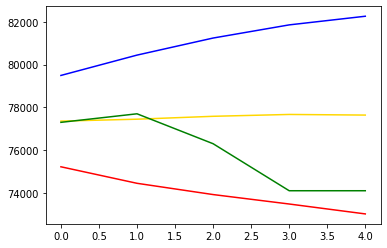

In [111]:
plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프
plt.plot(pred_y_lower, color="red") # 모델이 예상한 최소가격 그래프
plt.plot(pred_y_upper, color="blue") # 모델이 예상한 최대가격 그래프
plt.plot(test_y, color="green") # 실제 가격 그래프

In [112]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

rmse = sqrt(mean_squared_error(pred_y, test_y))
print(rmse)

2323.0899451907153


#### - facebook Prophet 모델
* Prophet은 Additive 모델이라는 모델링 방법에 기반한 시계열 예측모델로, 시계열 데이터의 트렌드성(연간/월간/일간)을 예측하는 것에 초점이 맞추어져 있음
*fbprophet 라이브러리를 사용하기 위해서는 변수 이름을 'ds'와 'y'로 변경
* 파라미터 설정
  - sesonality_mode: 연간, 월간, 주간, 일간 등의 트렌드성을 반영하는 것을 의미
  - changepoint_prior_scale: 트렌드가 변경되는 문맥을 반영 (수치가 높을수록 과적합)

In [114]:
from fbprophet import Prophet
samsung_df2 = samsung_df.reset_index()

samsung_df2.columns = ['ds', 'y']

samsung_train_df2 = samsung_df2[:180]
samsung_test_df2 = samsung_df2[180:]

In [115]:
prophet = Prophet(seasonality_mode= 'multiplicative',
                  yearly_seasonality = True,
                  weekly_seasonality = True,
                  daily_seasonality = True,
                  changepoint_prior_scale = 0.5)

prophet.fit(samsung_train_df2)

In [119]:
future_data = prophet.make_future_dataframe(periods = 5, freq = 'd')
forecast_data = prophet.predict(future_data)
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
180,2021-09-24,79290.812384,78143.862432,80549.075202
181,2021-09-25,66624.074682,65519.826938,67760.654831
182,2021-09-26,67951.278735,66713.391343,69105.663177
183,2021-09-27,83909.853148,82613.385350,85214.682475
184,2021-09-28,85999.120636,84526.624187,87399.314719


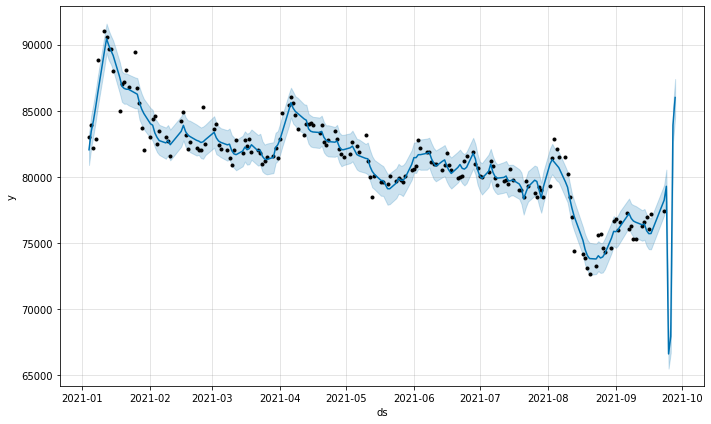

In [120]:
fig1 = prophet.plot(forecast_data)

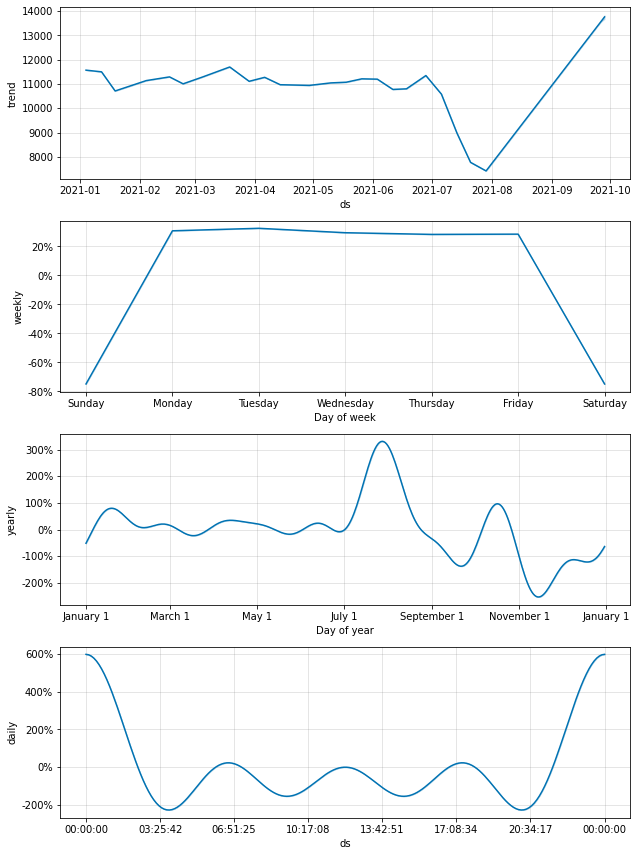

In [121]:
fig2 = prophet.plot_components(forecast_data)

In [122]:
pred_y = forecast_data.yhat.values[-5:]
test_y = samsung_test_df2.y.values
pred_y_lower = forecast_data.yhat_lower.values[-5:]
pred_y_upper = forecast_data.yhat_upper.values[-5:]

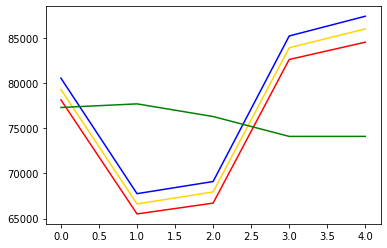

In [123]:
plt.plot(pred_y, color = 'gold')
plt.plot(pred_y_lower, color = 'red')
plt.plot(pred_y_upper, color = 'blue')
plt.plot(test_y, color = 'green')

In [125]:
rmse = sqrt(mean_squared_error(pred_y, test_y))
print(rmse)

# 일반적으로 FBprophet모델이 ARIMA보다 더 좋은 성능을 보이지만, 여기서는 ARIMA의 성능이 더 좋음 
# 상한가 및 하한가 설정, 이상치 제거, 파라미터 설정 등을 통해 성능 향상

9318.400002752865
